In [143]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [102]:
df = pd.read_csv('input_data/2017/student_feedback_surveys.csv')

In [103]:
df.head()

,ID,Location,Track,Week,Rating (Num),Schedule Pacing
0,134,San Francisco,"Apps, Explorer",Week 1,3,Just right
1,36,Los Angeles,Apps,Week 1,4,A little too fast
2,117,San Francisco,Games,Week 1,4,Way too slow
3,253,NaN,NaN,Week 2,4,A little too fast
4,350,New York City,"Apps, Explorer",Week 1,4,Just right


In [104]:
df['Rating (Num)'].value_counts()

8          392
9          384
10         376
7          177
6           59
5           35
4           13
3            8
#ERROR!      3
2            2
1            2
0            2
Name: Rating (Num), dtype: int64

In [105]:
# Get rid of the #ERROR! values
df = df[df['Rating (Num)'] != '#ERROR!']

In [106]:
df['Rating (Num)'].value_counts()

8     392
9     384
10    376
7     177
6      59
5      35
4      13
3       8
2       2
1       2
0       2
Name: Rating (Num), dtype: int64

In [107]:
df['Rating (Num)'].dtypes

dtype('O')

In [108]:
# Convert the rating column to ints
df['Rating (Num)'] = df['Rating (Num)'].astype('int64')

In [109]:
df['Rating (Num)'].dtypes

dtype('int64')

In [110]:
def get_promotors(df):
    return df[df['Rating (Num)'] >= 9]

def get_passives(df):
    return df[(df['Rating (Num)'] >= 7) & (df['Rating (Num)'] <= 8)]

def get_detractors(df):
    return df[df['Rating (Num)'] <= 6]

In [111]:
promoters = get_promotors(df)
passive = get_passives(df)
detractors = get_detractors(df)

In [112]:
num_promoters = len(promoters)
num_passive = len(passive)
num_detractors = len(detractors)

In [117]:
def print_nps_stats(n_pro, n_pass, n_det):
    print("# promoters: {}".format(n_pro))
    print("# Passive: {}".format(n_pass))
    print("# Detractors: {}".format(n_det))

print_nps_stats(num_promoters, num_passive, num_detractors)

# promoters: 760
# Passive: 569
# Detractors: 121


In [114]:
def get_NPS(n_pro, n_pass, n_det):
    return round((n_pro - n_det) / (n_pro + n_pass + n_det) * 100, 2)

In [115]:
print('NPS for 2017 data: {}'.format(get_NPS(num_promoters, num_passive, num_detractors)))

NPS for 2017 data: 44.07


In [118]:
#Get NPS by city

In [119]:
df.head()

,ID,Location,Track,Week,Rating (Num),Schedule Pacing
0,134,San Francisco,"Apps, Explorer",Week 1,3,Just right
1,36,Los Angeles,Apps,Week 1,4,A little too fast
2,117,San Francisco,Games,Week 1,4,Way too slow
3,253,NaN,NaN,Week 2,4,A little too fast
4,350,New York City,"Apps, Explorer",Week 1,4,Just right


In [201]:
df['Location'].value_counts()

San Francisco    360
New York City    330
Santa Clara      201
Los Angeles      106
Beijing           78
Chicago           70
Tokyo             65
Redwood City      58
Washington DC     47
Oakland           47
Atlanta           33
Hong Kong         11
Name: Location, dtype: int64

In [202]:
loc_group = df.groupby(['Rating (Num)'])["Location"].value_counts().unstack()

In [204]:
loc_group.fillna(value=0, inplace=True)

In [205]:
loc_group.columns

Index(['Atlanta', 'Beijing', 'Chicago', 'Hong Kong', 'Los Angeles',
       'New York City', 'Oakland', 'Redwood City', 'San Francisco',
       'Santa Clara', 'Tokyo', 'Washington DC'],
      dtype='object', name='Location')

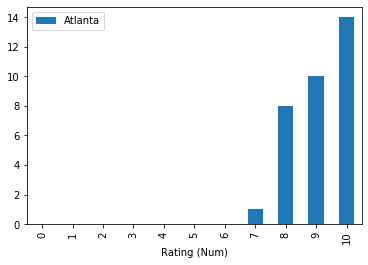

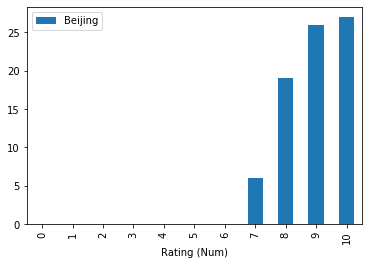

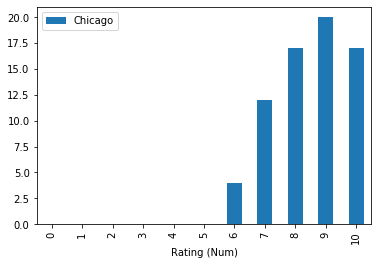

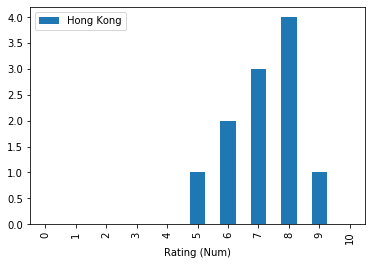

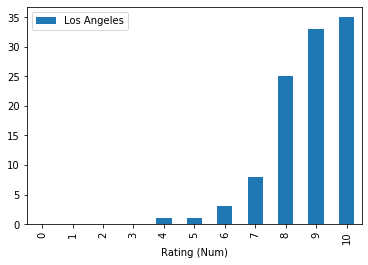

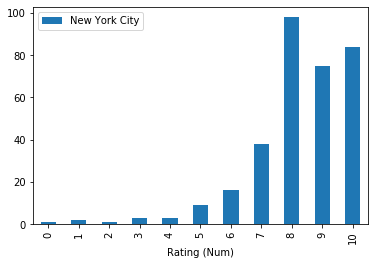

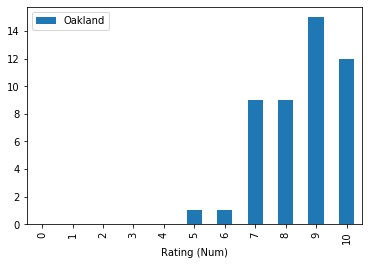

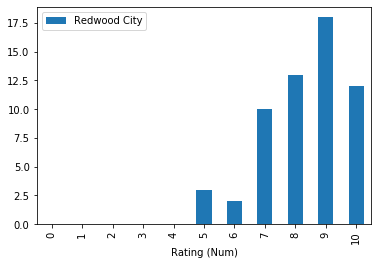

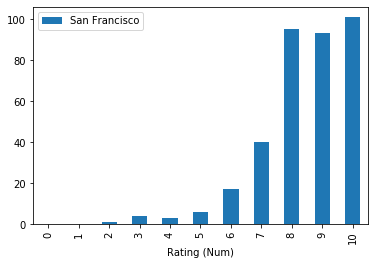

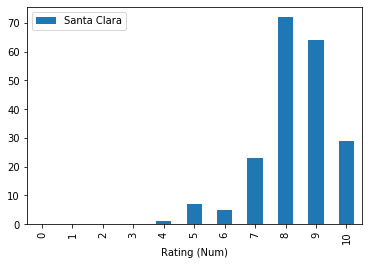

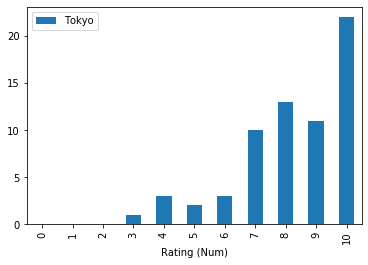

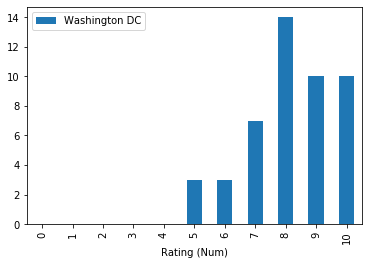

In [206]:
for col in loc_group.columns:
    loc_group.plot(y=col, kind='bar')

In [207]:
loc_group

Location,Atlanta,Beijing,Chicago,Hong Kong,Los Angeles,New York City,Oakland,Redwood City,San Francisco,Santa Clara,Tokyo,Washington DC
Rating (Num),,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,4.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,3.0,1.0,3.0,0.0
5,0.0,0.0,0.0,1.0,1.0,9.0,1.0,3.0,6.0,7.0,2.0,3.0
6,0.0,0.0,4.0,2.0,3.0,16.0,1.0,2.0,17.0,5.0,3.0,3.0
7,1.0,6.0,12.0,3.0,8.0,38.0,9.0,10.0,40.0,23.0,10.0,7.0
8,8.0,19.0,17.0,4.0,25.0,98.0,9.0,13.0,95.0,72.0,13.0,14.0


In [208]:
nps_dict = {}

for col in loc_group.columns:
    print(loc_group[0:5][col])

Rating (Num)
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Atlanta, dtype: float64
Rating (Num)
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Beijing, dtype: float64
Rating (Num)
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Chicago, dtype: float64
Rating (Num)
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Hong Kong, dtype: float64
Rating (Num)
0    0.0
1    0.0
2    0.0
3    0.0
4    1.0
Name: Los Angeles, dtype: float64
Rating (Num)
0    1.0
1    2.0
2    1.0
3    3.0
4    3.0
Name: New York City, dtype: float64
Rating (Num)
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Oakland, dtype: float64
Rating (Num)
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Redwood City, dtype: float64
Rating (Num)
0    0.0
1    0.0
2    1.0
3    4.0
4    3.0
Name: San Francisco, dtype: float64
Rating (Num)
0    0.0
1    0.0
2    0.0
3    0.0
4    1.0
Name: Santa Clara, dtype: float64
Rating (Num)
0    0.0
1    0.0
2    0.0
3    1.0
4    3.0
Name: Tokyo, dtype: float64
Rating 

In [163]:
# plot data
# fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
df.groupby(['Location'])

In [164]:
# fig_dims = (16, 16)
# fig, ax = plt.subplots(figsize=fig_dims)
# sns.barplot(x="Week", y="Location", data=loc_group)